#N-grams preprocessing


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(["Hellow, I am Dishant Korat. I am student of LDRP-itr. This is example of N-grams model"])
cv.vocabulary_

{'hellow': 4,
 'am': 0,
 'dishant': 1,
 'korat': 7,
 'student': 11,
 'of': 10,
 'ldrp': 8,
 'itr': 6,
 'this': 12,
 'is': 5,
 'example': 2,
 'grams': 3,
 'model': 9}

In [3]:
cv = CountVectorizer(ngram_range=(1,2))
cv.fit(["Thor Hathodawala is looking for a job"])
cv.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [4]:
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(["Thor Hathodawala is looking for a job"])
cv.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [6]:
corpus = [
"LDRP Institute of Technology and Research in Gandhinagar was established in 2006.",
"It was established as an institute of technical education"  ,
"The Computer Engineering Department of LDRP Institute of Technology and Research was established with the inception of the institute in 2005."  ,
"The institute has received approval for starting an additional MBA programme within the Engineering College from the academic year 2006-07."
]

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [10]:
preprocess(corpus[1])

'establish institute technical education'

In [12]:
processed_corpus= [
    preprocess(text) for text in corpus
]
processed_corpus

['LDRP Institute Technology Research Gandhinagar establish 2006',
 'establish institute technical education',
 'Computer Engineering Department LDRP Institute Technology Research establish inception institute 2005',
 'institute receive approval start additional MBA programme Engineering College academic year 2006 07']

In [14]:
cv = CountVectorizer(ngram_range=(1,2))
cv.fit(processed_corpus)
cv.vocabulary_

{'ldrp': 33,
 'institute': 28,
 'technology': 48,
 'research': 41,
 'gandhinagar': 24,
 'establish': 20,
 '2006': 2,
 'ldrp institute': 34,
 'institute technology': 32,
 'technology research': 49,
 'research gandhinagar': 43,
 'gandhinagar establish': 25,
 'establish 2006': 21,
 'technical': 46,
 'education': 16,
 'establish institute': 23,
 'institute technical': 31,
 'technical education': 47,
 'computer': 12,
 'engineering': 17,
 'department': 14,
 'inception': 26,
 '2005': 1,
 'computer engineering': 13,
 'engineering department': 19,
 'department ldrp': 15,
 'research establish': 42,
 'establish inception': 22,
 'inception institute': 27,
 'institute 2005': 29,
 'receive': 39,
 'approval': 8,
 'start': 44,
 'additional': 6,
 'mba': 35,
 'programme': 37,
 'college': 10,
 'academic': 4,
 'year': 50,
 '07': 0,
 'institute receive': 30,
 'receive approval': 40,
 'approval start': 9,
 'start additional': 45,
 'additional mba': 7,
 'mba programme': 36,
 'programme engineering': 38,
 'en

###Ngram vector

In [23]:
cv.transform([corpus[1]]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0]])

#sarcasm detection dataset

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/NLP 7th sem/dataset/Sarcasm_Headlines_Dataset_v2.json', lines = True)
print(df.shape)

df.head()

(28619, 3)


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [34]:
df.is_sarcastic.value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

###preprocessing

In [37]:
df['headline'] = df['headline'].apply(preprocess)

In [40]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientist unveil doomsday cloc...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep totally nail congress fall short gende...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggie 9 deliciously different recipe,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar get work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretty close word stream correctly,https://www.theonion.com/mother-comes-pretty-c...


###model


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    df.headline,
    df.is_sarcastic,
    test_size=0.2,
    random_state=2022,
    stratify=df.is_sarcastic
)

In [46]:
print(X_train.shape)
X_train.head()

(22895,)


7339     beloved archie comic_strip dark makeover new t...
21234    philly independence mall pope francis offer de...
2117     college rape victim pretty thrilled get recoun...
3678                   care change pharmaceutical industry
25977           hillary clinton take defeat democrats 2008
Name: headline, dtype: object

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('Multi NB', MultinomialNB())])

##prediction

In [62]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print("report\n\n",classification_report(y_test, y_pred))

report

               precision    recall  f1-score   support

           0       0.82      0.81      0.82      2997
           1       0.80      0.81      0.80      2727

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724



Text(95.72222222222221, 0.5, 'Actual')

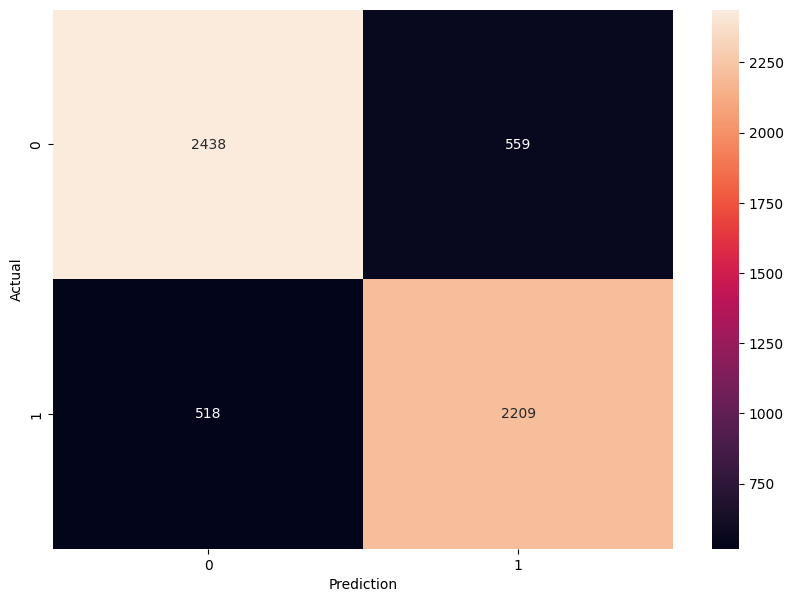

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')